In [369]:
import pandas as pd

df = pd.read_csv("C:/Users/vetri/OneDrive/Desktop/ML roadmap/data/train.csv")
df
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [531]:
test_data = pd.read_csv("C:/Users/vetri/OneDrive/Desktop/ML roadmap/data/test.csv")
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


## Visualization

In [371]:
df_viz = df.copy()
df_viz = df_viz.drop(labels=['Name', 'Ticket', 'Cabin','PassengerId'], axis='columns')
df_viz = df_viz.dropna()

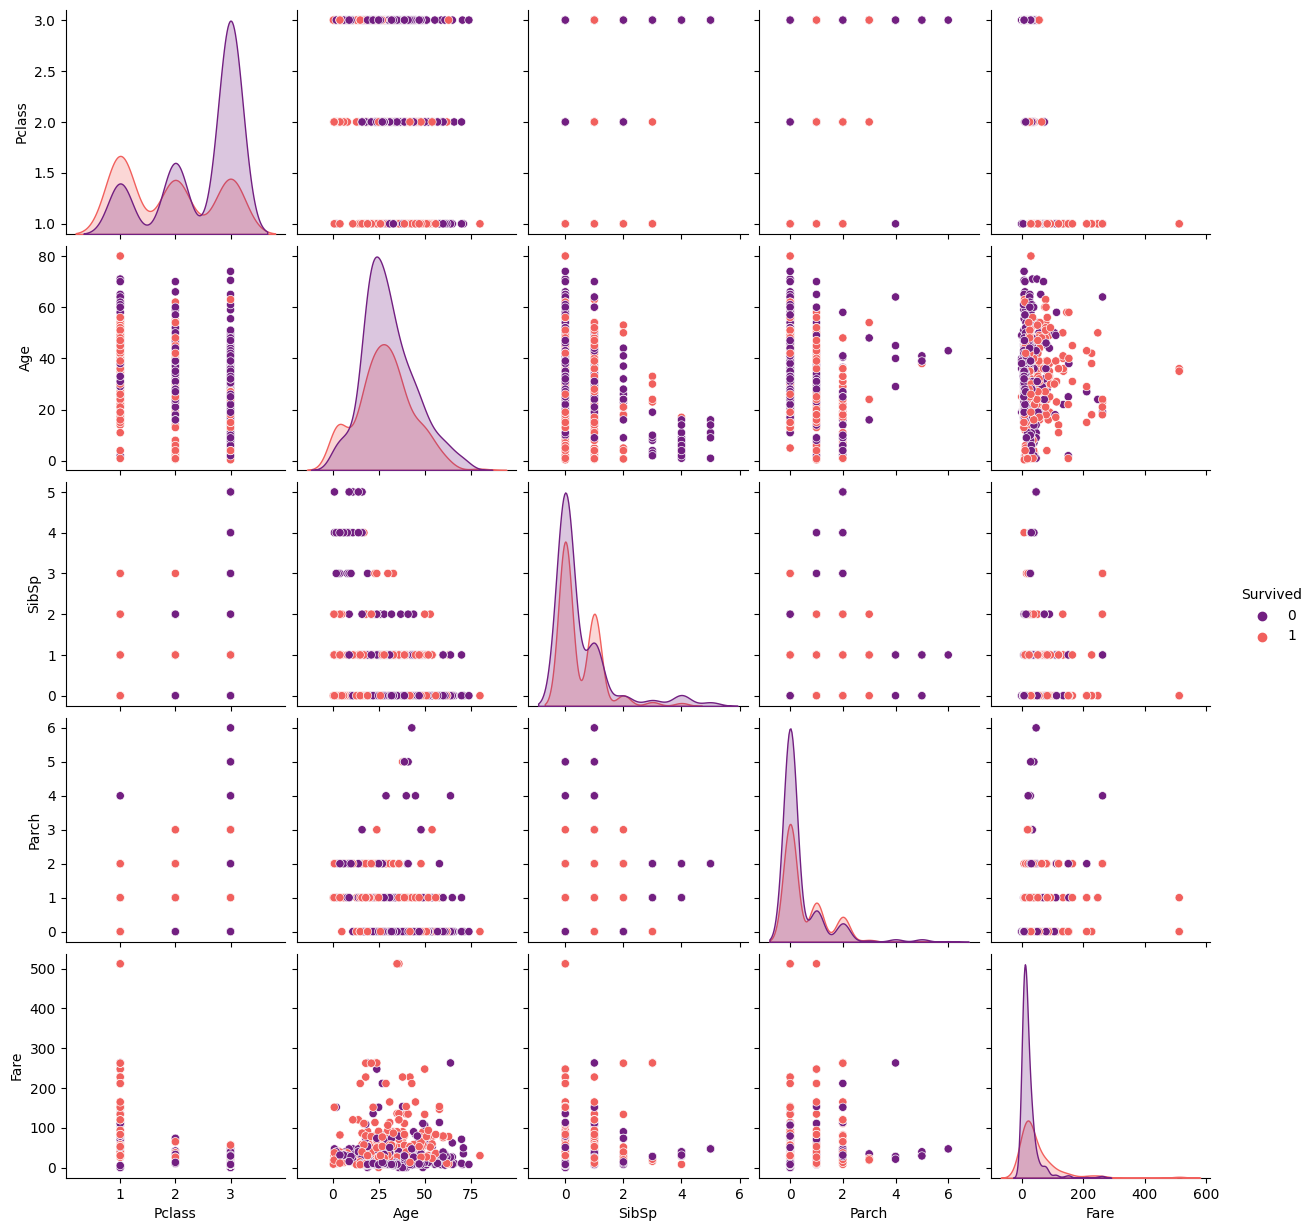

In [372]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.pairplot(data=df_viz,hue="Survived",palette="magma",  # Color palette  # Marker style  # Transparency
             )

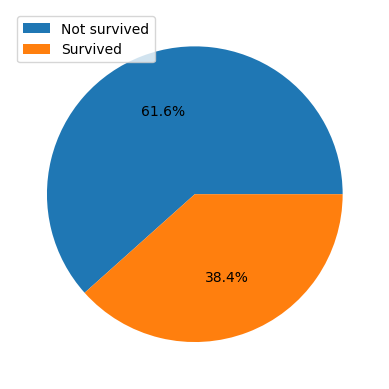

In [373]:
plt.pie(df['Survived'].value_counts(),autopct='%1.1f%%')
plt.legend(['Not survived','Survived'])

<Axes: ylabel='Count'>

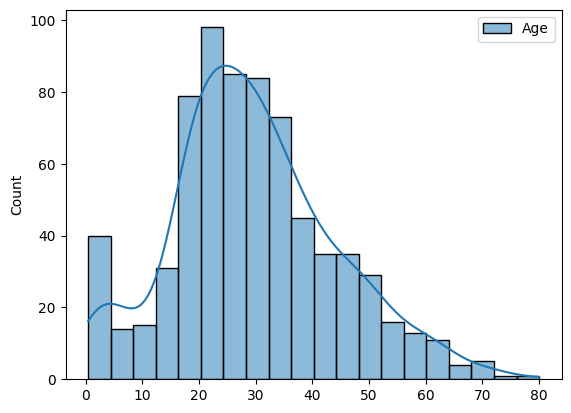

In [374]:
sns.histplot(df[["Age"]],kde=True,color="red")

<Axes: xlabel='Pclass', ylabel='Age'>

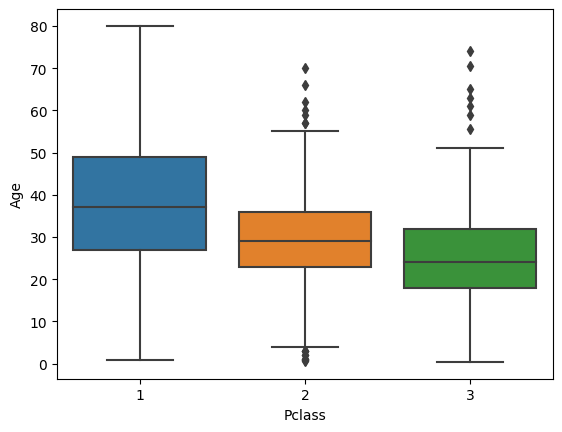

In [375]:
sns.boxplot(x="Pclass",y="Age",data=df_viz)

<Axes: xlabel='Sex', ylabel='Survived'>

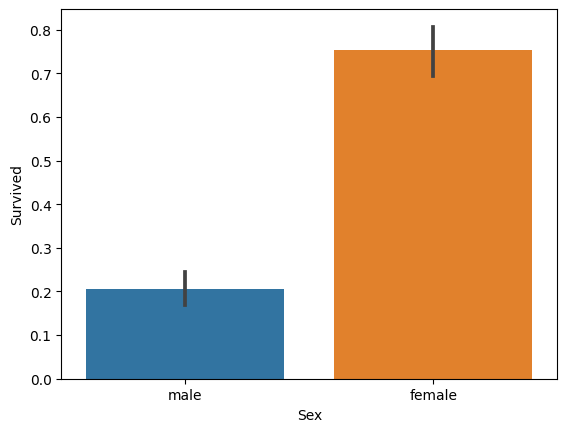

In [376]:
sns.barplot(x="Sex",y="Survived",data=df_viz)

<Axes: xlabel='Pclass', ylabel='Fare'>

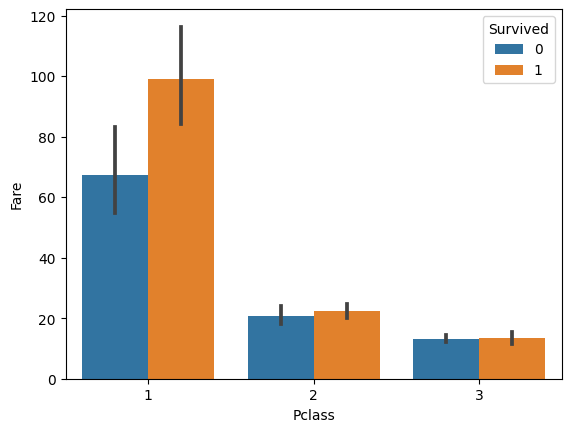

In [377]:
sns.barplot(x="Pclass",y="Fare",hue="Survived",data=df_viz)

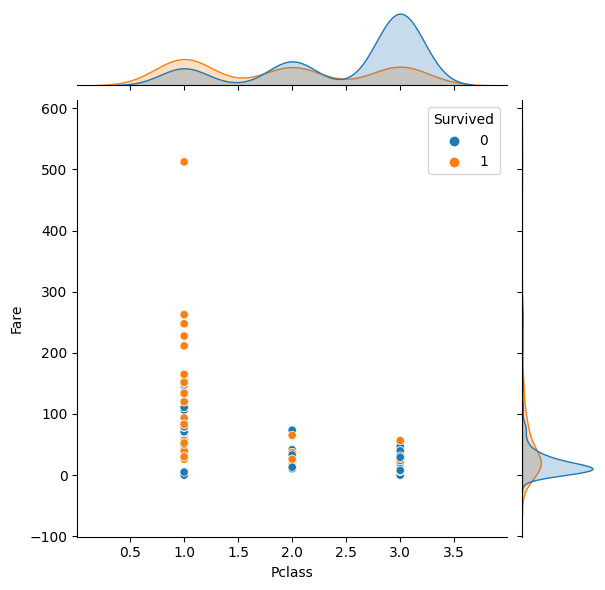

In [378]:
sns.jointplot(x="Pclass",y="Fare",hue="Survived",data=df_viz)

<Axes: >

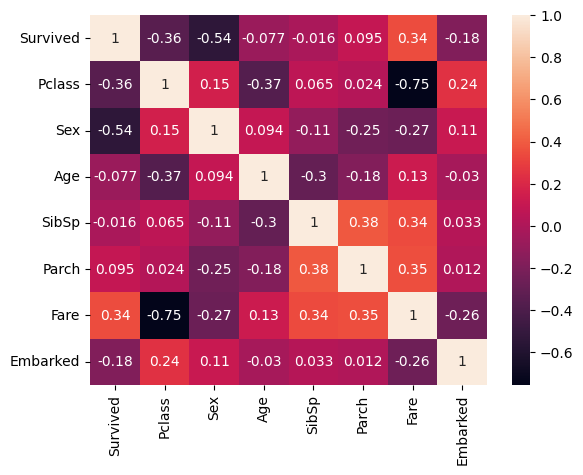

In [379]:
from sklearn.preprocessing import LabelEncoder

df_viz = df_viz.apply(LabelEncoder().fit_transform)
sns.heatmap(df_viz.corr(),annot=True)

<Axes: xlabel='Embarked', ylabel='count'>

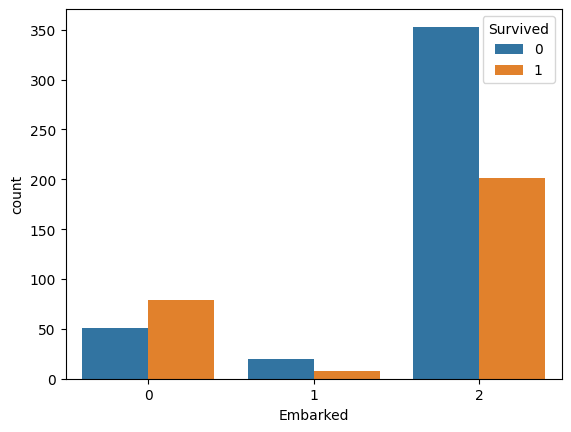

In [380]:
sns.countplot(data=df_viz, x="Embarked", hue="Survived")

## Data Preprocessing pipeline

In [518]:
from sklearn.base import BaseEstimator, TransformerMixin

class DropColumns(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        return X.drop(labels=['Name', 'Ticket', 'Cabin','PassengerId'], axis='columns')

In [519]:
from sklearn.impute import SimpleImputer
class ImputeAge(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    # def transform(self, X, y=None):
    #     # Ensure the DataFrame is copied to avoid changing the original one
    #     X = X.copy()

    #     # Impute missing values based on median age per Pclass group
    #     X['Age'] = X.groupby(['Pclass','SibSp'])['Age'].apply(lambda x: x.fillna(x.median())).values
    def transform(self, X, y=None):
        X['Age'] = SimpleImputer(strategy='mean').fit_transform(X[['Age']])
        return X

In [520]:

class EncodeCategorical(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        X['Male'] = (X['Sex'] == 'male').astype(int)
        X['Female'] = (X['Sex'] == 'female').astype(int)
        X.drop(labels=['Sex'], axis='columns', inplace=True)
        for col in ['C','S','Q','N']:
            X[col] = (X['Embarked'] == col).astype(int)
        X.drop(labels=['Embarked'], axis='columns', inplace=True)
        
        for idx, classes in enumerate(['1st class', '2nd class', '3rd class']):
            X[classes] = (X['Pclass'] == idx).astype(int)
        X.drop(labels=['Pclass'], axis='columns', inplace=True)
        X.drop(labels=['N'], axis='columns', inplace=True)
            
        return X


In [521]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('drop_columns', DropColumns()),
    ('impute_age', ImputeAge()),
    ('encode_categorical', EncodeCategorical())
])



In [ ]:
x_data = pipeline.fit_transform(df)
x_data.describe()

In [385]:
x_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        891 non-null    float64
 1   SibSp      891 non-null    int64  
 2   Parch      891 non-null    int64  
 3   Fare       891 non-null    float64
 4   Male       891 non-null    int32  
 5   Female     891 non-null    int32  
 6   C          891 non-null    int32  
 7   S          891 non-null    int32  
 8   Q          891 non-null    int32  
 9   1st class  891 non-null    int32  
 10  2nd class  891 non-null    int32  
 11  3rd class  891 non-null    int32  
dtypes: float64(2), int32(8), int64(2)
memory usage: 55.8 KB


In [387]:
y_data = df['Survived']
y_data.count().sum()

891

## Model Selection and Training

In [388]:
y_data.value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [442]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_data = scaler.fit_transform(x_data)


In [443]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=42,stratify=y_data)
# stratify=y_data maintains the class y balance in train and test

In [512]:
from xgboost import XGBClassifier
# from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

stack_clf = StackingClassifier(
    estimators=[
        ('rf', RandomForestClassifier(random_state=42,n_estimators=300,max_depth=5)),
        ('xgb', XGBClassifier(random_state=42,n_estimators=300,max_depth=5)),
        ('gb', GradientBoostingClassifier(random_state=42,n_estimators=300,max_depth=5)),
        ('ada', AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),learning_rate=0.5,random_state=42)),
        ('knn', KNeighborsClassifier(n_neighbors=4)),
        ('svc', SVC(kernel='linear',probability=True))
    ],
    final_estimator=LogisticRegression(),
    cv=5
)

stack_clf.fit(x_data, y_data)


StackingClassifier(cv=5,
                   estimators=[('rf',
                                RandomForestClassifier(max_depth=5,
                                                       n_estimators=300,
                                                       random_state=42)),
                               ('xgb',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              device=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric=None,
                                              feature_types=None, gamma=...
                                              num_parallel_tree=None,
                                              random_state=42, ...)),
                               ('gb',
                                GradientBoostingClassifier(max_depth=5,
                                                           n_estimators=300,
                                                           random_state=42)),
                               ('ada',
                                AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                                                   learning_rate=0.5,
                                                   random_state=42)),
                               ('knn', KNeighborsClassifier(n_neighbors=4)),
                               ('svc', SVC(kernel='linear', probability=True))],
                   final_estimator=LogisticRegression())

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = stack_clf.predict(x_test)

print(classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Reds',fmt="g")

In [535]:
test_data = pd.read_csv("C:/Users/vetri/OneDrive/Desktop/ML roadmap/data/test.csv")
test_data = pipeline.fit_transform(test_data)
test_data['Fare'].fillna(test_data['Fare'].mean(), inplace=True)
test_data_scaled = StandardScaler().fit_transform(test_data)

In [538]:
test_data = pd.read_csv("C:/Users/vetri/OneDrive/Desktop/ML roadmap/data/test.csv")

In [539]:
final_predations = stack_clf.predict(test_data_scaled)
final_predations
reslut = pd.DataFrame({"PassengerId": test_data["PassengerId"], "Survived": final_predations})
reslut.to_csv('submission.csv', index=False)

In [427]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
param_dist = {
    'n_estimators': randint(100, 1000),      # Random number of trees
    'max_depth': randint(3, 20),             # Random depths of trees
    'min_samples_split': randint(2, 10),     # Random number of samples to split
    'min_samples_leaf': randint(1, 5),       # Random number of leaf samples
    'bootstrap': [True, False]               # Whether to use bootstrap sampling
}

# Initialize the model
xgb = RandomForestClassifier(random_state=42)

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(
    xgb,              # The model
    param_distributions=param_dist,   # The parameter grid
    n_iter=100,       # Number of random parameter combinations to try
    cv=5,             # 5-fold cross-validation
    scoring='accuracy',  # Metric to optimize
    random_state=42,  # For reproducibility
    n_jobs=-1         # Use all available processors
)

random_search.fit(x_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000021246A91BD0>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000021246A97950>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000021246A94D50>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000021248C98450>},
                   random_state=42, scoring='accuracy')

{'bootstrap': False, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 12, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 4, 'min_samples_split': 7, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 576, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}
              precision    recall  f1-score   support

           0       0.81      0.91      0.86       110
           1       0.82      0.67      0.74        69

    accuracy                           0.82       179
   macro avg       0.82      0.79      0.80       179
weighted avg       0.82      0.82      0.81       179



<Axes: >

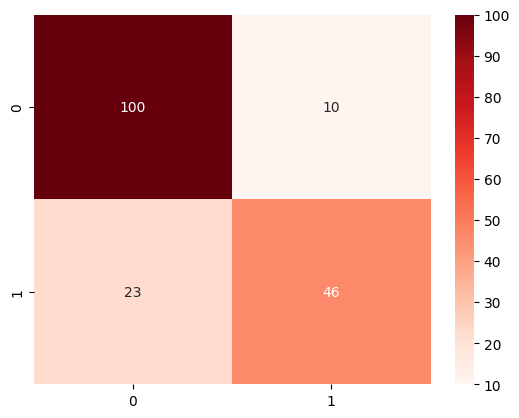

In [429]:
best_model = random_search.best_estimator_
print(best_model.get_params())
y_pred = best_model.predict(x_test)
print(classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Reds',fmt="g")

In [449]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(256, activation='relu', input_shape=(x_train.shape[1],)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

history = model.fit(x_data,y_data,epochs=700,validation_split=0.2)

Epoch 1/700
23/23 [==============================] - 1s 9ms/step - loss: 0.5559 - accuracy: 0.7444 - val_loss: 0.3813 - val_accuracy: 0.8268
Epoch 2/700
23/23 [==============================] - 0s 3ms/step - loss: 0.4431 - accuracy: 0.8090 - val_loss: 0.3747 - val_accuracy: 0.8324
Epoch 3/700
23/23 [==============================] - 0s 3ms/step - loss: 0.4340 - accuracy: 0.7978 - val_loss: 0.3654 - val_accuracy: 0.8771
Epoch 4/700
23/23 [==============================] - 0s 4ms/step - loss: 0.4178 - accuracy: 0.8202 - val_loss: 0.3485 - val_accuracy: 0.8547
Epoch 5/700
23/23 [==============================] - 0s 4ms/step - loss: 0.4147 - accuracy: 0.8216 - val_loss: 0.3495 - val_accuracy: 0.8659
Epoch 6/700
23/23 [==============================] - 0s 3ms/step - loss: 0.4292 - accuracy: 0.8160 - val_loss: 0.3585 - val_accuracy: 0.8436
Epoch 7/700
23/23 [==============================] - 0s 4ms/step - loss: 0.3998 - accuracy: 0.8174 - val_loss: 0.3495 - val_accuracy: 0.8883
Epoch 8/700
2

In [450]:
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_100 (Dense)           (None, 256)               3328      
                                                                 
 dense_101 (Dense)           (None, 128)               32896     
                                                                 
 dense_102 (Dense)           (None, 128)               16512     
                                                                 
 dense_103 (Dense)           (None, 128)               16512     
                                                                 
 dense_104 (Dense)           (None, 256)               33024     
                                                                 
 dense_105 (Dense)           (None, 1)                 257       
                                                                 
Total params: 102,529
Trainable params: 102,529
Non-t

6/6 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.92      0.95      0.93       110
           1       0.91      0.87      0.89        69

    accuracy                           0.92       179
   macro avg       0.91      0.91      0.91       179
weighted avg       0.92      0.92      0.92       179



<Axes: >

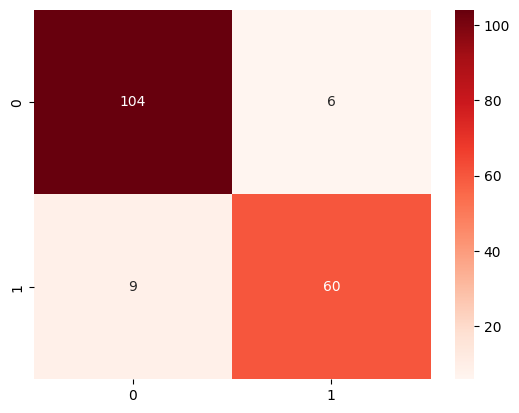

In [452]:
import numpy as np
y_pred = model.predict(x_test)
y_pred = np.where(y_pred > 0.5, 1, 0)
print(classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Reds',fmt="g")

#### torch model

In [453]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset, random_split
import numpy as np


In [454]:
# Convert to torch tensors
X = torch.tensor(x_data, dtype=torch.float32)  # Features
y = torch.tensor(y_data, dtype=torch.float32)  # Labels

# Create a Dataset
dataset = TensorDataset(X, y)

# Split into training and validation sets (80% train, 20% valid)
train_size = int(0.8 * len(dataset))
valid_size = len(dataset) - train_size
train_dataset, valid_dataset = random_split(dataset, [train_size, valid_size])

# Create DataLoaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
valid_loader = DataLoader(valid_dataset, batch_size=32, shuffle=False)


In [504]:
class TitanicModel(nn.Module):
    def __init__(self, input_size):
        super(TitanicModel, self).__init__()
        # Input -> Hidden -> Output
        self.fc1 = nn.Linear(input_size, 256)  # First hidden layer
        self.fc2 = nn.Linear(256, 128)          # Second hidden layer
        self.fc3 = nn.Linear(128, 128)           # Output layer (1 output for binary classification)        # Output layer (1 output for binary classification)
        self.fc4 = nn.Linear(128, 256)           # Output layer (1 output for binary classification)          # Output layer (1 output for binary classification)
        self.fc5 = nn.Linear(256, 1)           # Output layer (1 output for binary classification)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()  # Sigmoid for binary classification
    
    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.relu(self.fc3(x))
        x = self.relu(self.fc4(x))
        x = self.sigmoid(self.fc5(x))  # Apply sigmoid to the final output
        return x


In [505]:
# Get the input size (number of features)
input_size = x_data.shape[1]

# Initialize the model, loss function, and optimizer
model = TitanicModel(input_size=input_size)
criterion = nn.BCELoss()  # Binary cross entropy loss
optimizer = optim.Adam(model.parameters(), lr=0.001)


In [506]:
# Train the model
num_epochs = 550  # You can adjust the number of epochs

for epoch in range(num_epochs):
    model.train()  # Set the model to training mode
    
    running_loss = 0.0
    for batch_idx, (inputs, labels) in enumerate(train_loader):
        # Zero the gradients
        optimizer.zero_grad()
        
        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels.unsqueeze(1))  # Match output and label dimensions
        
        # Backward pass and optimization
        loss.backward()
        optimizer.step()
        
        # Accumulate loss for the batch
        running_loss += loss.item()
    
    # Print training loss
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}')


Epoch [1/550], Loss: 0.5514
Epoch [2/550], Loss: 0.4672
Epoch [3/550], Loss: 0.4407
Epoch [4/550], Loss: 0.4385
Epoch [5/550], Loss: 0.4237
Epoch [6/550], Loss: 0.4285
Epoch [7/550], Loss: 0.4006
Epoch [8/550], Loss: 0.4031
Epoch [9/550], Loss: 0.3921
Epoch [10/550], Loss: 0.3878
Epoch [11/550], Loss: 0.3793
Epoch [12/550], Loss: 0.3836
Epoch [13/550], Loss: 0.3725
Epoch [14/550], Loss: 0.3779
Epoch [15/550], Loss: 0.3724
Epoch [16/550], Loss: 0.3718
Epoch [17/550], Loss: 0.3728
Epoch [18/550], Loss: 0.3817
Epoch [19/550], Loss: 0.3641
Epoch [20/550], Loss: 0.3601
Epoch [21/550], Loss: 0.3476
Epoch [22/550], Loss: 0.3594
Epoch [23/550], Loss: 0.3511
Epoch [24/550], Loss: 0.3472
Epoch [25/550], Loss: 0.3571
Epoch [26/550], Loss: 0.3483
Epoch [27/550], Loss: 0.3586
Epoch [28/550], Loss: 0.3482
Epoch [29/550], Loss: 0.3394
Epoch [30/550], Loss: 0.3239
Epoch [31/550], Loss: 0.3307
Epoch [32/550], Loss: 0.3287
Epoch [33/550], Loss: 0.3283
Epoch [34/550], Loss: 0.3351
Epoch [35/550], Loss: 0

In [509]:
model.eval()  # Set the model to evaluation mode
correct = 0
total = 0

with torch.no_grad():  # Disable gradient calculation during evaluation
    for inputs, labels in valid_loader:
        outputs = model(inputs)
        predicted = (outputs > 0.5).float()  # Convert probabilities to 0 or 1
        total += labels.size(0)
        correct += (predicted.squeeze() == labels).sum().item()

accuracy = correct / total
print(f'Validation Accuracy: {accuracy:.4f}')



Validation Accuracy: 0.7821


In [510]:
test_loader = DataLoader(x_test, batch_size=32, shuffle=False)
all_preds = []
all_labels = []

# Set the model to evaluation mode
model.eval()

with torch.no_grad():
    for inputs, labels in valid_loader:
        # Forward pass to get predictions
        outputs = model(inputs)
        
        # Convert probabilities to binary labels
        predicted = (outputs > 0.5).float()
        
        # Store predictions and true labels
        all_preds.extend(predicted.cpu().numpy())  # Move to CPU and convert to NumPy array
        all_labels.extend(labels.cpu().numpy())

# Convert lists to numpy arrays for sklearn metrics
all_preds = np.array(all_preds).flatten()
all_labels = np.array(all_labels).flatten()

In [511]:
# Generate the classification report
report = classification_report(all_labels, all_preds, target_names=['Not Survived', 'Survived'])
print(report)


              precision    recall  f1-score   support

Not Survived       0.85      0.81      0.83       115
    Survived       0.68      0.73      0.71        64

    accuracy                           0.78       179
   macro avg       0.76      0.77      0.77       179
weighted avg       0.79      0.78      0.78       179



## Models Used

In [ ]:
# from sklearn.ensemble import RandomForestRegressor
# Model method use it if you want to predict missing values
# class ImputeAge(BaseEstimator, TransformerMixin):
#     def __init__(self):
#         self.model = RandomForestRegressor(n_estimators=100, random_state=42)
#         self.age_features = ['Pclass', 'Male', 'SibSp', 'Parch', 'Fare', 'C', 'S', 'Q']  # Features to predict Age

#     def fit(self, X, y=None):
#         # Train the model on rows where 'Age' is not missing
#         age_not_null = X[X['Age'].notnull()]
#         X_train = age_not_null[self.age_features]
#         y_train = age_not_null['Age']
        
#         self.model.fit(X_train, y_train)  # Train the model
#         return self

#     def transform(self, X, y=None):
#         # Copy the dataframe to avoid altering the original
#         X_copy = X.copy()

#         # Predict missing ages for rows where 'Age' is null
#         age_null = X_copy[X_copy['Age'].isnull()]
#         if not age_null.empty:
#             X_missing = age_null[self.age_features]
#             predicted_ages = self.model.predict(X_missing)
            
#             # Impute the missing 'Age' values
#             X_copy.loc[X_copy['Age'].isnull(), 'Age'] = predicted_ages
        
#         return X_copy

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Initialize the model
rf = RandomForestClassifier(random_state=42)

# Set up hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 2, 4]
}

# Use GridSearchCV or RandomizedSearchCV for tuning
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best model
best_rf = grid_search.best_estimator_

# Make predictions
y_predRFC = best_rf.predict(X_test)


In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

# Initialize the model
xgb = XGBClassifier(random_state=42)

# Set up hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

# Use GridSearchCV for tuning
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best model
best_xgb = grid_search.best_estimator_

# Make predictions
y_predXGB = best_xgb.predict(X_test)


In [ ]:
final_predictions = best_xgb.predict(test_data)

In [ ]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split

# Assuming X_train, y_train are your training features and labels
train_data = lgb.Dataset(X_train, label=y_train)

# Define LightGBM parameters
params = {
    'objective': 'binary',
    'boosting_type': 'gbdt',
    'metric': 'binary_logloss',
    'is_unbalance': True,  # Handle class imbalance
    'learning_rate': 0.01,  # Reduce the learning rate
    'max_depth': 7,  # Increase tree depth
    'min_data_in_leaf': 20,  # Reduce leaf size
    'num_leaves': 31,  # Control complexity of the model
    'min_gain_to_split': 0,  # Allow splits with lower gain
    'feature_fraction': 0.8,  # Use a subset of features
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': -1
}

# Train the model
bst = lgb.train(params, train_data, num_boost_round=100)

# Make predictions
y_predLgb = bst.predict(X_test)


array([0., 1., 1., 1., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 1., 0.,
       1., 0., 1., 0., 1., 1., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1., 0.,
       0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0.,
       0., 1., 1., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0.,
       1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1.,
       1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0.,
       0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0.,
       1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1.,
       1., 0., 0., 1., 0., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0.,
       1., 0., 0., 1., 1., 1., 0., 1., 0., 0., 0., 1., 1., 0., 1., 0., 1.,
       0., 0., 0., 1., 0.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

# Logistic Regression with Scaling Pipeline
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(random_state=42))
])

param_grid = {
    'logreg__C': [0.01, 0.1, 1, 10],  # Regularization strength
    'logreg__penalty': ['l2'],  # L2 regularization
}

grid_search = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best model
best_logreg = grid_search.best_estimator_

# Make predictions
y_predLog = best_logreg.predict(X_test)


In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# SVM with Scaling Pipeline
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(random_state=42))
])

param_grid = {
    'svm__C': [0.1, 1, 10],
    'svm__kernel': ['linear', 'rbf'],
    'svm__gamma': ['scale', 0.1, 1]
}

grid_search = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best model
best_svm = grid_search.best_estimator_

# Make predictions
y_predSVM = best_svm.predict(X_test)


In [ ]:
from sklearn.metrics import accuracy_score

# Print classification report
print("SVM:",accuracy_score(y_test, y_predSVM))
print("RFC:",accuracy_score(y_test, y_predRFC))
print("XGB:",accuracy_score(y_test, y_predXGB))
print("LogReg:",accuracy_score(y_test, y_predLog))
print("LGB:",accuracy_score(y_test, y_predLgb.round()))

SVM: 1.0
RFC: 1.0
XGB: 1.0
LogReg: 1.0
LGB: 1.0
